### Utilizamos el archivo que armamos con todas las variables.

In [1]:
import pandas as pd
import numpy as np
dnixradiocindixfila=pd.read_csv('Datos/datos_c_seleccion.csv', index_col=0)


In [2]:
#  quitamos del archivo la columna con el label target.
X_train=dnixradiocindixfila.drop(columns=['target'])
# por otro lado armamos el arhivo con los resultados
y_train=dnixradiocindixfila.target

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')

In [3]:
folds=10

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=folds, random_state=5)


# Create arrays and dataframes to store results
oof_preds = np.zeros(X_train.shape[0])
#sub_preds = np.zeros(X_test.shape[0])
feature_importance_df = pd.DataFrame()
feats = [f for f in X_train.columns]

# X is the feature set and y is the target
for train_idx, valid_idx in skf.split(X_train,y_train): 
    print("Train:", train_idx, "Validation:", valid_idx)
    train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
    valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]


###  Modelo con Parametros Optimizado con Cross Validation (CV) 
Aplicamos el modelo LIGHT GB con los valores de los hiperparametros encontrados en la optimización, con early stopping (cv LightGBM)

In [5]:
results = pd.read_csv('Datos/bayes_test.csv')
results=results.sort_values('score', ascending = False).reset_index(drop = True)
# Uilizo el mejor resultado
hyperparameters = results.loc[0, 'hyperparameters']
print('Hiperparametros: ', hyperparameters)


Hiperparametros:  {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.9327992276257075, 'is_unbalance': False, 'learning_rate': 0.020972552144714853, 'min_child_samples': 110, 'num_leaves': 124, 'reg_alpha': 0.678907006302082, 'reg_lambda': 0.08624711694400033, 'subsample_for_bin': 220000, 'subsample': 0.8372297281400392, 'n_estimators': 99}


In [6]:
import lightgbm as lgb

hyperparameters= {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.9327992276257075, 'is_unbalance': False, 'learning_rate': 0.020972552144714853, 'min_child_samples': 110, 'num_leaves': 124, 'reg_alpha': 0.678907006302082, 'reg_lambda': 0.08624711694400033, 'subsample_for_bin': 220000, 'subsample': 0.8372297281400392, 'n_estimators': 99}
model = lgb.LGBMClassifier(**hyperparameters)

# Train and make predicions with model. Acá utilizamos el validation set 
model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200 )

# Record the best iteration
best_iteration = model.best_iteration_

Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[99]	training's auc: 0.973783	training's binary_logloss: 0.244933	valid_1's auc: 0.963534	valid_1's binary_logloss: 0.264912


In [7]:
import lightgbm as lgb

hyperparameters={'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.9547556844112091, 'is_unbalance': False, 'learning_rate': 0.026723499491329992, 'min_child_samples': 85, 'num_leaves': 36, 'reg_alpha': 0.04552807199301889, 'reg_lambda': 0.8173426353657135, 'subsample_for_bin': 240000, 'subsample': 0.5700755057889628, 'n_estimators': 146}

model = lgb.LGBMClassifier(**hyperparameters)

# Train and make predicions with model. Acá utilizamos el validation set 
model.fit(X_train,y_train, verbose= 200)

# Record the best iteration
best_iteration = model.best_iteration_

### Ahora evaluamos el modelo en  TEST



In [8]:
#del X_test, y_test

In [5]:
X_test=pd.read_csv('xtest.csv', index_col = 'dni')


In [6]:
y_test=pd.read_csv('ytest.csv',index_col = 'dni' )
y_test.head()

,target
dni,
29315311,1.0
6030698,1.0
7744943,1.0
34594141,1.0
10664787,1.0


In [10]:
X_train.columns

Index(['años', 'personasxvivienda', 'Area_RC', 'Pje_Total_BP_en_RC',
       'Porcentaje_de_hogares_con_conexion_a_red', '%conaccesoredgas',
       '%dehogarescnib', '%conaccesoredeagua', 'connivelsec', 'cestudiosuper',
       'pmedioalto', 'genero_F', 'genero_M', 'antiguedadmeses', 'monto_mean',
       'monto_max', 'monto_min', 'monto_last', 'monto_first', 'codent_nunique',
       'sit_mean', 'sit_max', 'sit_last', 'sit_first', 'pct_mean', 'pct_min',
       'pct_last'],
      dtype='object')

In [11]:
X_test = X_test[X_train.columns]


In [12]:
X_test.columns

Index(['años', 'personasxvivienda', 'Area_RC', 'Pje_Total_BP_en_RC',
       'Porcentaje_de_hogares_con_conexion_a_red', '%conaccesoredgas',
       '%dehogarescnib', '%conaccesoredeagua', 'connivelsec', 'cestudiosuper',
       'pmedioalto', 'genero_F', 'genero_M', 'antiguedadmeses', 'monto_mean',
       'monto_max', 'monto_min', 'monto_last', 'monto_first', 'codent_nunique',
       'sit_mean', 'sit_max', 'sit_last', 'sit_first', 'pct_mean', 'pct_min',
       'pct_last'],
      dtype='object')

In [14]:
# si utilizamos el proba me calcula las probabilidades
from sklearn.metrics import roc_auc_score
preds = model.predict_proba(X_test[feats], num_iteration=model.best_iteration_)[:, 1]#/ skf.n_splits


In [15]:
baseline_auc = roc_auc_score(y_test, preds)
print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The baseline model scores 0.95893 ROC AUC on the test set.


In [16]:
#con el predict solo me predice si es una clase o la otra.
preds2 = model.predict(X_test[feats], num_iteration=model.best_iteration_)

### Evaluacion del modelo
Recordemos que los deudores con situacion mayor a 2 son los q no pagan= 0

In [18]:
# NO DEBEN SER MUY DISTINTOS, SINO ES SIGNO DE OVERFITTING
rocauctrain=roc_auc_score(y_train, model.predict(X_train))
rocauc=roc_auc_score(y_test, preds)

In [19]:
rocauctrain

0.9079691081351023

In [20]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
rocauc

0.9589305743751881

In [21]:
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.


#### Precision-Recall curve¶


In [22]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, preds)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, thresholds=precision_recall_curve(y_test, preds, pos_label=1)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Average precision-recall score: 0.99


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.99')

#### ROC Curve
The Reciever Operating Characteristic (ROC) curve graphs the true positive rate versus the false positive rate

In [23]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.show()


#### Feature importance

In [25]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = feats
feature_importance_df["importance"] = model.feature_importances_
#feature_importance_df["importance_gain"] = model.feature_importances(importance_type='gain')
#feature_importance_df["importance_split"] = model.feature_importances_(importance_type='split')


In [26]:
feature_importance_df.sort_values('importance', ascending=False)

,feature,importance
19,codent_nunique,516
20,sit_mean,492
13,antiguedadmeses,459
26,pct_last,423
0,años,342
15,monto_max,335
18,monto_first,313
17,monto_last,308
21,sit_max,289
14,monto_mean,259


In [27]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]


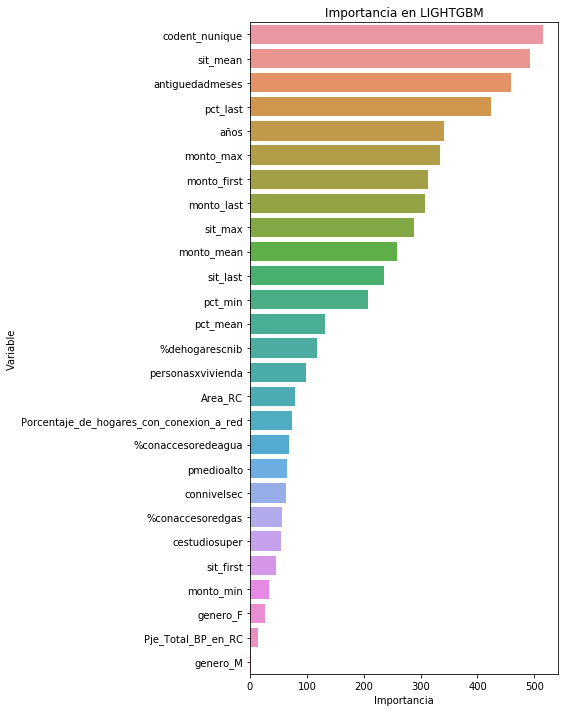

In [28]:
import seaborn as sns
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('Importancia en LIGHTGBM')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [29]:
#Otras métricas
model.score(X_test, y_test) 

0.8923333333333333

In [30]:
#Evaluamos el modelo de clasifciación
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, preds2)


0.8978545618789522

In [31]:
from sklearn.metrics import classification_report
target_names = ['No cumple', 'Cumple']
print(classification_report(y_test, preds2, target_names=target_names))

              precision    recall  f1-score   support

   No cumple       0.64      0.91      0.75      1080
      Cumple       0.98      0.89      0.93      4920

   micro avg       0.89      0.89      0.89      6000
   macro avg       0.81      0.90      0.84      6000
weighted avg       0.92      0.89      0.90      6000



In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, preds2)

0.9312473392933163

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds2)

array([[ 979,  101],
       [ 545, 4375]], dtype=int64)

In [34]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 979  101]
 [ 545 4375]]


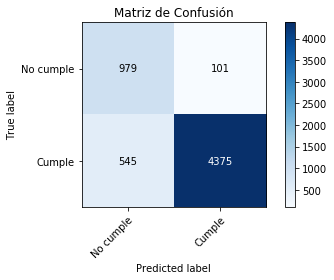

In [35]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, preds2, classes=target_names,
                      title='Matriz de Confusión')



Normalized confusion matrix
[[0.90648148 0.09351852]
 [0.11077236 0.88922764]]


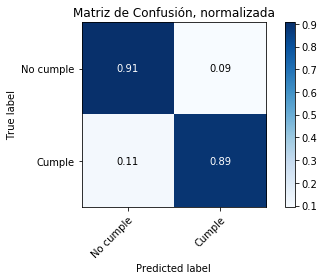

In [36]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, preds2, classes=target_names,normalize=True,
                      title='Matriz de Confusión, normalizada')